Firstly, we should download the obligatory dataset and
turn it into object of the `pandas.Series` type to be able to make actions within our task.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

df = pd.read_csv('age_bloodpressure_full.csv')
X = 'cholesterol'
X = df[X]
X

0      173.937038
1      197.640273
2      160.405813
3      161.923470
4      159.888034
          ...    
195    195.899989
196    158.097880
197    171.218835
198    182.284987
199    165.688699
Name: cholesterol, Length: 200, dtype: float64

### Paragraph 1
#### *Key Summary Statistics*

I have choosed the column *cholesterol* as the random variable ***X***. Now we should calculate key summary statistics:  ( mean,  median,  mode, minimum 
and maximum, variance and standard deviation, skewness, kurtosis) 

In [8]:
print ("========= Key Summary Statistics =========\n")
# Calculate and print key summary statistics

stats = X.describe()
stats.name = None
print(stats.to_string())
print("Variance: ", X.var())
print("Skewness: ", X.skew())
print("Kurtosis: ", X.kurtosis())
print("Mode: ", X.mode()[0])

print("\n" + "="*30 + "\n")

========= Key Summary Statistics =========

count    200.000000
mean     180.820828
std       15.454879
min      138.973694
25%      170.905015
50%      182.463375
75%      190.568684
max      214.718214
Variance:  238.85328260385612
Skewness:  -0.34186382092938106
Kurtosis:  -0.3226169015479976
Mode:  138.97369417414603




### Paragraph 2
#### Plot histogram, boxplot, Q–Q plot to visualize the distribution

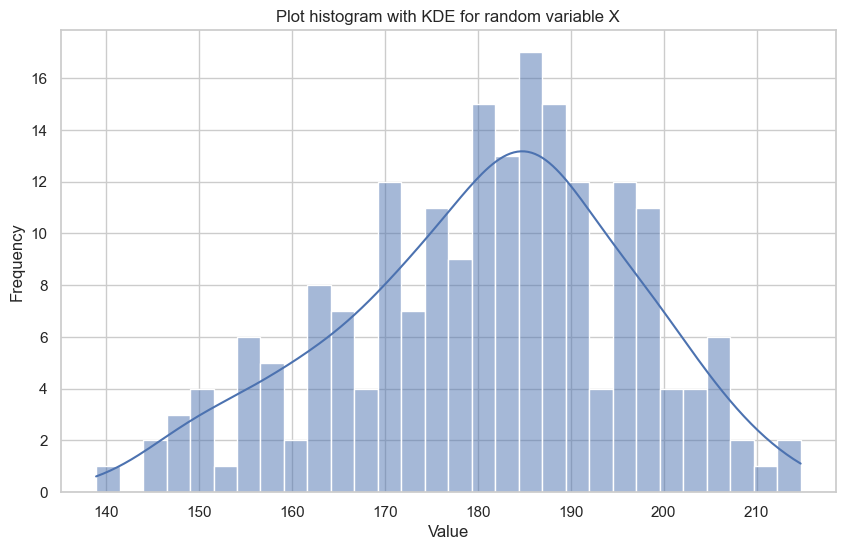

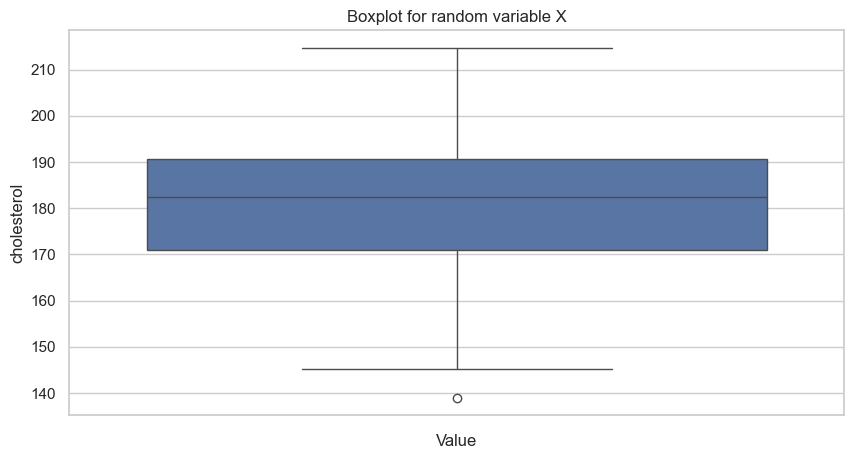

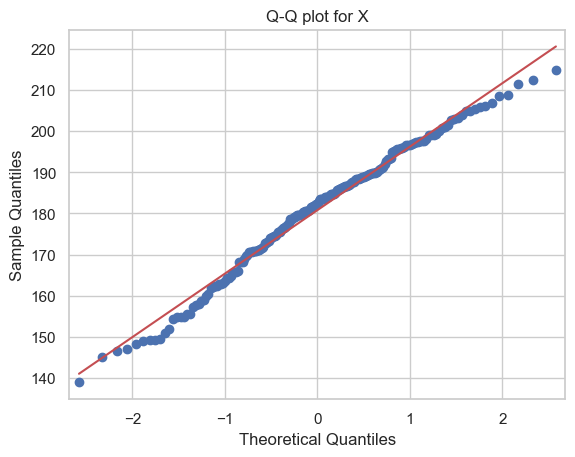

In [9]:
# Set seaborn style
sns.set(style="whitegrid")

# 1. Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(X, kde=True, bins=30)
plt.title('Plot histogram with KDE for random variable X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(X)
plt.title('Boxplot for random variable X')
plt.xlabel('Value')
plt.show()

# 3. Q-Q plot
sm.qqplot(X, line='s')
plt.title(f'Q-Q plot for X')
plt.show()

## Conclusion on Distribution Analysis

Based on the histogram, boxplot, and Q-Q plot, we can draw the following conclusions about the distribution of the variable "cholesterol" (or "*X*"):

* **1. Overall Shape and Peaks:**
    * The **histogram** and its accompanying KDE (Kernel Density Estimate) curve show a clear **unimodal** (single-peaked) and **bell-shaped** distribution.
    * The majority of the data is concentrated in the center, with a peak around the 185-190 value range.

* **2. Skewness:**
    * The distribution appears to be **highly symmetrical**.
    * **Histogram:** The left and right tails of the plot are nearly identical in shape and length.
    * **Boxplot:** The median line (the bold line inside the box) is located **almost perfectly in the center** of the interquartile range (the box). This is a strong indicator of zero or near-zero skewness.

* **3. Kurtosis and Normality:**
    * The **Q-Q plot** is the most telling graph for this. The vast majority of the data points fall **very closely along the red diagonal line**.
    * This indicates that the data's distribution is an **excellent match for a theoretical normal distribution**.
    * The kurtosis (peak shape) is likely **mesokurtic** (close to 0), similar to a standard normal distribution. It does not appear overly "peaked" (leptokurtic) or "flat" (platykurtic).

* **4. Outliers:**
    * The **boxplot** clearly identifies **one potential low-value outlier**, represented by the single point near the 140 value.
    * The **Q-Q plot** corroborates this: the bottom-left point deviates slightly downward from the reference line, indicating a value that is lower than expected in a perfect normal distribution.

**Final Summary:** The "cholesterol" variable is **approximately normally distributed**. It is symmetrical, unimodal, and has a normal-like peak. There is one potential low-value outlier present in the dataset.

## Normality Tests (***$\chi^2$*** and Shapiro Wilk)

Now we should handle 2 normality tests due to the instructions in the task requirements. Firstly that is obligatory to implement 
Chi-Squared test(***$\chi^2$***).

In [4]:
import numpy as np

mean = X.mean()
std = X.std(ddof=1)
n = len(X)

num_bins = 10 
inner_bins = np.percentile(X, np.linspace(10, 90, num_bins - 1))
bins = np.concatenate(([-np.inf], inner_bins, [np.inf]))

observed_freq, _ = np.histogram(X, bins=bins)

expected_freq = []
for i in range(num_bins):
    prob = stats.norm.cdf(bins[i+1], loc=mean, scale=std) - stats.norm.cdf(bins[i], loc=mean, scale=std)
    expected_freq.append(prob * n)

chi_stat, p_value = stats.chisquare(f_obs=observed_freq, 
                                      f_exp=expected_freq, 
                                      ddof=2)

print("\n--- 1. Chi-Squared Test for Normality ---\n")
print(f"[STATS] Chi-Square: {chi_stat:.4f}")
print(f"[P] P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("[CONCL]: Data is NOT normally distributed (p <= 0.05).")
else:
    print("[CONCL]: Data IS normally distributed (p > 0.05).")


--- 1. Chi-Squared Test for Normality ---

[STATS] Chi-Square: 16.8441
[P] P-value: 0.0184
[CONCL]: Data is NOT normally distributed (p <= 0.05).


Secondly we should implement second normality test. I used Shapiro Wilk test.

In [15]:
# --- 2. Shapiro-Wilk Test for Normality ---
shapiro_stat, p_value_shapiro = stats.shapiro(X)

print("\n--- 2. Shapiro-Wilk Test for Normality ---")
print(f"[STATS] (W-stat): {shapiro_stat:.4f}")
print(f"[P] P-value: {p_value_shapiro:.4f}")

if p_value_shapiro <= 0.05:
    print("[CONCL]: Data is NOT normally distributed (p <= 0.05).")
else:
    print("[CONCL]: Data IS normally distributed (p > 0.05).")


--- 2. Shapiro-Wilk Test for Normality ---
[STATS] (W-stat): 0.9849
[P] P-value: 0.0308
[CONCL]: Data is NOT normally distributed (p <= 0.05).


## Final Conclusion on Normality Tests

We used the **p-value approach** to compare the results from two normality tests. The chosen significance level (alpha) is **$\alpha = 0.05$**.

* **Null Hypothesis ($H_0$):** The data is normally distributed.
* **Alternative Hypothesis ($H_1$):** The data is *not* normally distributed.

**Decision Rule:** If the p-value is less than or equal to 0.05 (p $\le$ 0.05), we reject the null hypothesis ($H_0$) and conclude the data is *not* normal.

---

### Comparison of Test Results

1.  **Chi-Squared Goodness of Fit Test:**
    * **P-value:** `0.0184`
    * **Conclusion:** Since the p-value (0.0184) is **less than 0.05**, we **reject the null hypothesis ($H_0$)**.

2.  **Shapiro-Wilk Test:**
    * **P-value:** `0.0308`
    * **Conclusion:** Since the p-value (0.0308) is **less than 0.05**, we **reject the null hypothesis ($H_0$)**.

---

### Final Conclusion

The results from both tests are **in agreement**.

Both the **Chi-Squared test (p = 0.0184)** and the **Shapiro-Wilk test (p = 0.0308)** returned p-values that are less than our significance level of 0.05.

**Final Verdict:** Both formal statistical tests provide evidence to **reject the null hypothesis**. We conclude that the data's distribution is **statistically significantly different from a normal distribution**. This finding contradicts the initial visual assessment (from Task 1) which suggested approximate normality, highlighting the importance of formal testing.

## Find Correlations

In that step we need to find some corelations between numerical values, if it is possible.

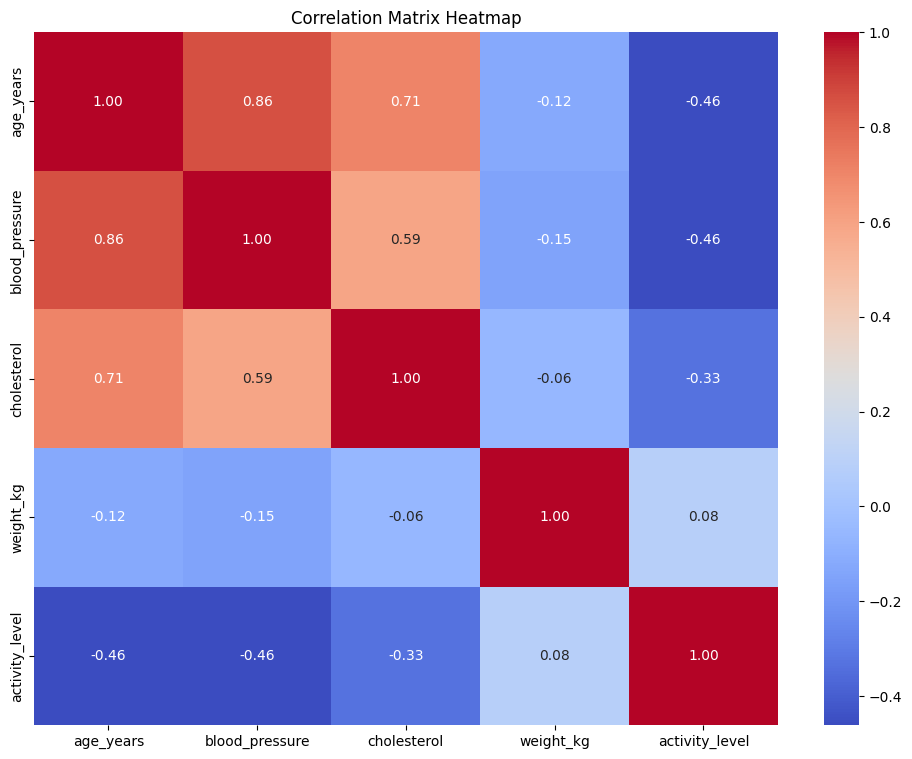

In [5]:
df_corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 9))

sns.heatmap(
    df_corr, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can observe some pairs of values with **strong** corelation, such as: (age;cholesterol), (age;blood pressure). 

Also some **moderate** connections between variables were also found: (blood pressure;cholesterol). 

However, we can find some **weak** corelations: (cholesterol;activity level), (blood pressure;activity level), (weight;activity level), (weight;cholesterol), (weight;blood pressure), (weight;age), (age; activity level)

#### *Strength*
What it means: How strong they are connected (how near ***r*** is located to **1** or **-1**).

***r*** = 0: No linear connection.
***r*** = 1 or ***r*** = -1: Ideal connection.

Ranges of ***r*** :

* ~0.0 – 0.3 (or -0.3 – 0.0): Weak

* ~0.3 – 0.7 (or -0.7 – -0.3): Moderate

* ~0.7 – 1.0 (or -1.0 – -0.7): Strong

## Implementation od the model

In that step we need to implement simple linear regression model to guess the value of **dependent** variable ***Y*** within the value of **independent** variable ***X***.

* As ***Y*** I choosed the column 'cholesterol'.
* As ***X*** I choosed the column 'age'.

I have made that, because of the high ***r*** corelation level between them, that was found in our previous task.

The regression model has a vue as follows:
$$
Y = \beta_0 + \beta_1 X
$$


                            OLS Regression Results                            
Dep. Variable:            cholesterol   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     198.5
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           1.12e-31
Time:                        09:28:06   Log-Likelihood:                -761.44
No. Observations:                 200   AIC:                             1527.
Df Residuals:                     198   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.5282      2.219     68.292      0.0

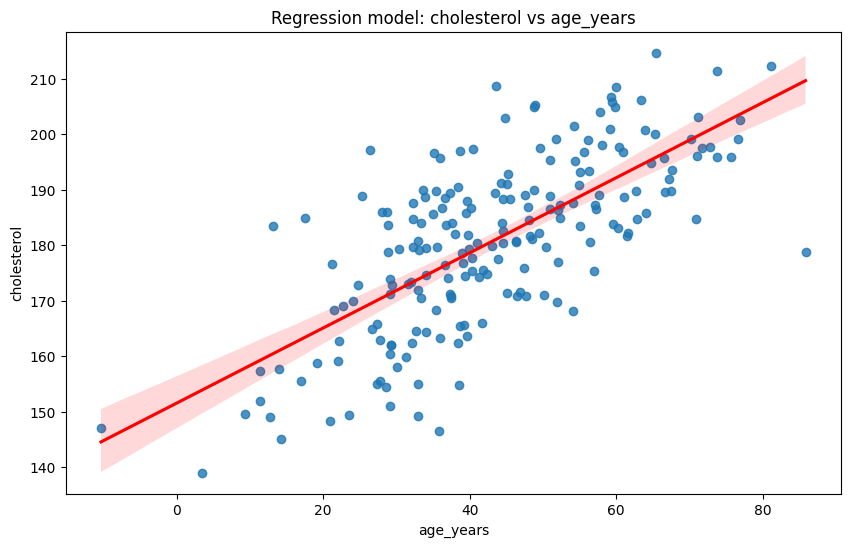

In [7]:
Y = df['cholesterol']   
X = df['age_years'] 

# Add constant to the independent variable
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X_with_const)
results = model.fit()
print(results.summary())

# 4. Test residuals for normality using Shapiro-Wilk test
residuals = results.resid
shapiro_stat, p_value_shapiro = stats.shapiro(residuals)

print(f"\n--- Shapiro-Wilk test for residuals ---")
print(f"P-value: {p_value_shapiro:.4f}")

if p_value_shapiro <= 0.05:
    print("[CONCL]: Data is NOT normally distributed (p <= 0.05).")
else:
    print("[CONCL]: Data IS normally distributed (p > 0.05).")

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=Y, line_kws={"color":"red"}) 
plt.title(f'Regression model: {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.show()

## Final Conclusion on Linear Regression

A simple linear regression analysis was conducted to determine if `age_years` (X) could significantly predict `cholesterol` (Y). The visual scatter plot with the regression line shows a clear positive linear trend. The formal statistical results from the OLS model confirm this relationship.

---

### 1. Estimated Model Coefficients

Based on the OLS results, the estimated regression equation is:

**`cholesterol = 151.53 + 0.6776 * age_years`**

* **Intercept ($\beta_0$):** 151.53. This is the model's predicted `cholesterol` value when `age_years` is zero.
* **Coefficient ($\beta_1$):** 0.6776. This indicates that for each additional year of age, the `cholesterol` level is predicted to increase by **0.6776 points**.

---

### 2. Statistical Significance of Coefficients (T-Test)

The statistical significance of the predictor variable (`age_years`) is evaluated to determine if it has a real effect on the dependent variable (`cholesterol`).

* **Null Hypothesis ($H_0$):** The coefficient for `age_years` is zero ($\beta_1 = 0$), meaning it has no effect on `cholesterol`.
* **Result:** The p-value (`P>|t|`) for `age_years` is **0.000** (or more precisely, 14.087 is the t-statistic).
* **Conclusion:** Since the p-value is significantly **less than 0.05**, we **reject the null hypothesis**. This confirms that `age_years` is a **statistically significant predictor** of `cholesterol`.

---

### 3. Overall Model Quality Assessment

We assess the model's overall fit and explanatory power using the R-squared and the F-statistic.

* **R-squared ($R^2$):** The model has an **R-squared of 0.501**. This means that `age_years` **explains 50.1% of the variability** in `cholesterol` levels. This indicates a **moderate to strong** relationship.
* **Fisher Significance Test (F-Test):** The F-statistic tests the overall significance of the model.
    * **Null Hypothesis ($H_0$):** The model is not useful (all coefficients are zero).
    * **Result:** The `Prob (F-statistic)` is **1.12e-31** (a number extremely close to zero).
    * **Conclusion:** Since this p-value is far **less than 0.05**, we **reject the null hypothesis**. The model as a whole is **statistically significant** and provides a better fit than an intercept-only model (i.e., just using the average `cholesterol`).

---

### 4. Check of Model Residuals for Normality

A key assumption of OLS regression is that the model's errors (residuals) are normally distributed.

* **Test Used:** Shapiro-Wilk Test.
* **Null Hypothesis ($H_0$):** The residuals are normally distributed.
* **Result:** The p-value for the Shapiro-Wilk test was **0.8709**.
* **Conclusion:** Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**. This is a **good result**, as it confirms the residuals **are normally distributed**, validating a key assumption of our model.

---

### 5. Final Conclusion

**Yes, the data strongly supports the existence of a linear relationship.**

All statistical tests confirm this:
1.  The independent variable `age_years` is a **highly significant predictor** (p < 0.001).
2.  The overall model is **highly significant** (p < 0.001).
3.  The model explains a moderate and meaningful portion of the variance (**R² = 50.1%**).
4.  The relationship is **positive**, with `cholesterol` increasing by 0.68 points for every year of age.
5.  The model's assumptions are met, as confirmed by the normality of residuals.